로지스틱회귀
==
- 시험 합격자와 불합격자의 시험공부시간 관계
- 로지스틱 회귀로 모델링

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

합격, 불합격자 데이터
--

In [9]:
pass_time = [9, 9, 9.5, 10, 12, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2,2.1,2.2,2.3,2.5,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3,3,3.5, 4,4.2,4.4,4.6,4.8, 5,5.2,5.4, 4.4,4.6,4.8,5.0,5.2,5.4]

In [10]:
type(pass_time)

list

In [11]:
p_frame = pd.DataFrame(pass_time, columns=['study'])
type(p_frame)
p_frame.head()

,study
0,9.0
1,9.0
2,9.5
3,10.0
4,12.0


In [12]:
p_frame['pass'] =1
p_frame.head()

,study,pass
0,9.0,1
1,9.0,1
2,9.5,1
3,10.0,1
4,12.0,1


In [13]:
f_frame = pd.DataFrame(fail_time, columns=['study'])
f_frame['pass'] =0
f_frame.head()

,study,pass
0,1.0,0
1,2.0,0
2,2.1,0
3,2.2,0
4,2.3,0


In [14]:
frames = [p_frame, f_frame]
sum = pd.concat(frames)
sum.head()

,study,pass
0,9.0,1
1,9.0,1
2,9.5,1
3,10.0,1
4,12.0,1


In [15]:
x = sum['study'].values
x

array([ 9. ,  9. ,  9.5, 10. , 12. , 15. , 16. , 16. , 16.5, 17. , 17. ,
       17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.2,  2.3,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  3. ,
        3.5,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  4.4,  4.6,
        4.8,  5. ,  5.2,  5.4])

In [16]:
y = sum['pass'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

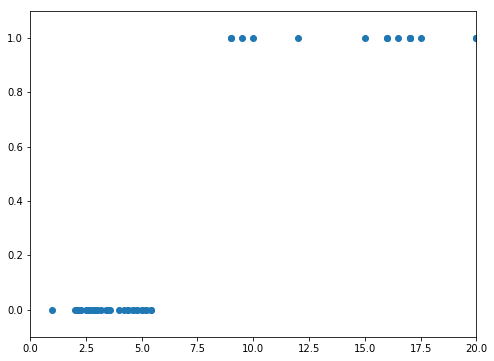

In [17]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel='Study time'
plt.ylabel='Pass rate'
plt.scatter(x, y )

In [18]:
from sklearn.linear_model import LogisticRegression

로지스틱 리그레션 모델
--

In [19]:
model = LogisticRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
print(model.coef_)
print(model.intercept_)

[[0.39284576]]
[-3.15299547]


새로운 값에 대한 예측
--


In [21]:
print(model.predict(320))

[1]


In [22]:
def logreg(y):
    return 1 /(1+np.exp(-y))

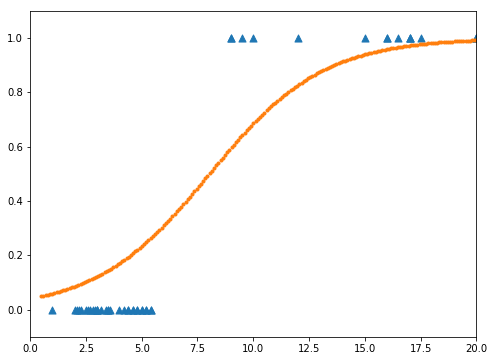

In [23]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel='Study time'
plt.ylabel='Pass rate'
plt.scatter(x, y, marker = '^',s=50)

XX = np.linspace(0.5,20,200)
plt.scatter(x=XX,y=logreg(model.coef_*XX+model.intercept_),marker=".")